Это тестовый файл, чтобы наглядно показывать этапы разработки

In [2]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
path_test_images = '/Users/dimka777/Documents/GitHub/AutoDoc/TestImages'

In [4]:
list_path_images = os.listdir(path_test_images)

In [5]:
list_path_images = [os.path.join(path_test_images, path) for path in list_path_images]

In [6]:
# тут читаю изобаржения
list_images = [cv2.imread(path_image) for path_image in list_path_images]

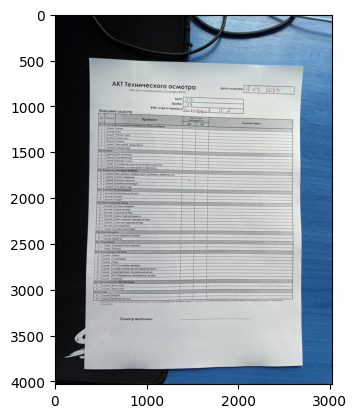

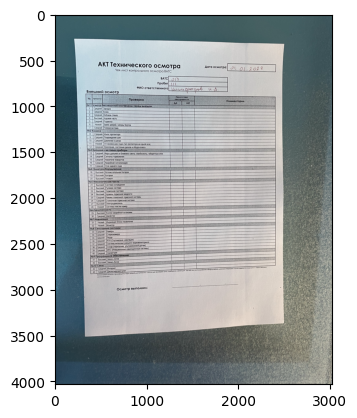

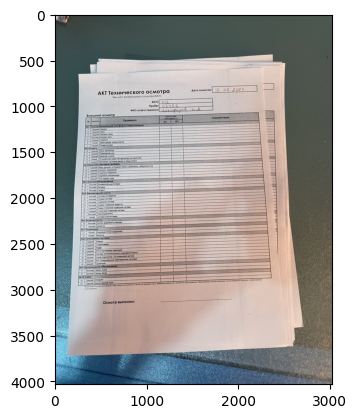

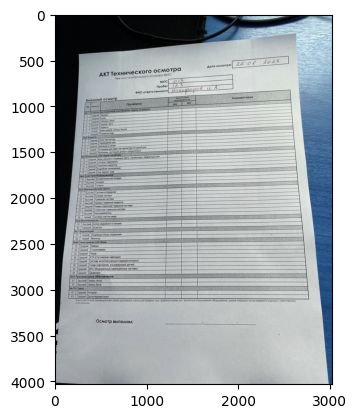

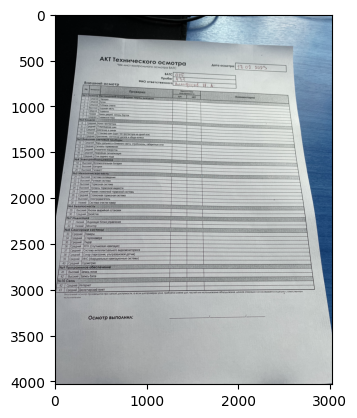

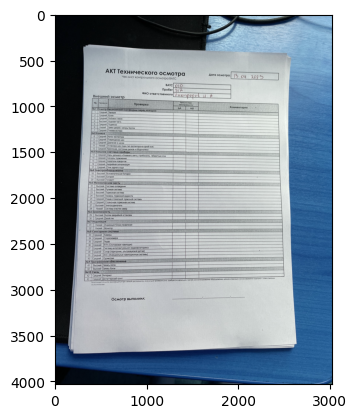

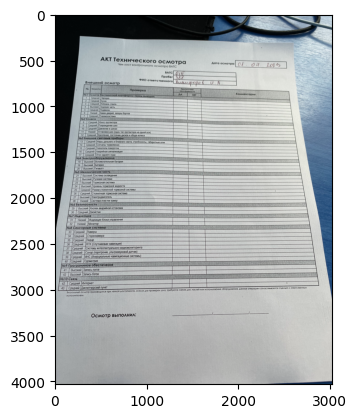

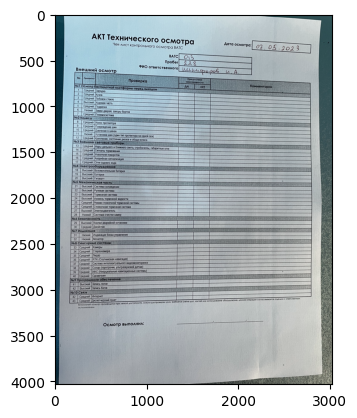

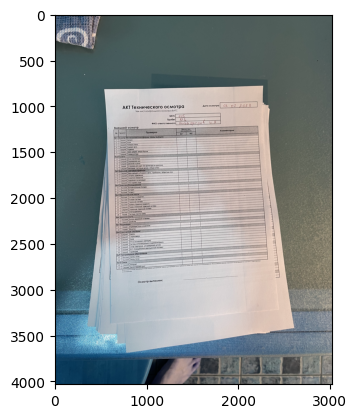

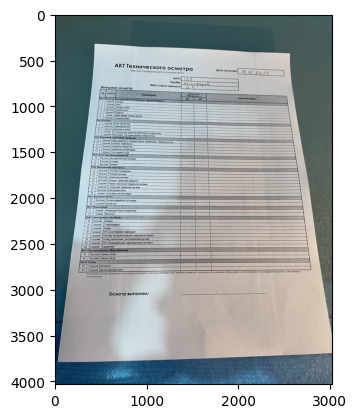

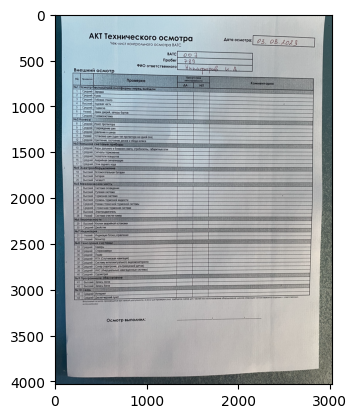

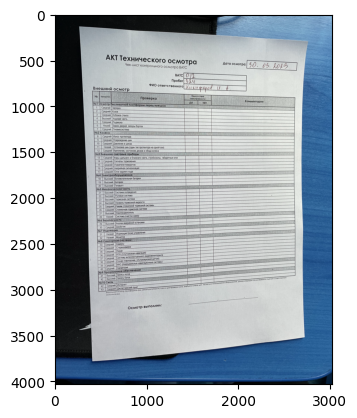

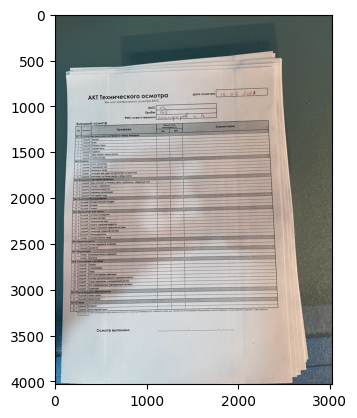

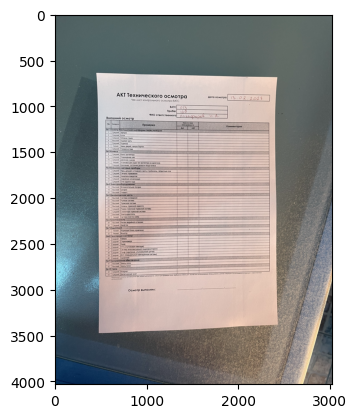

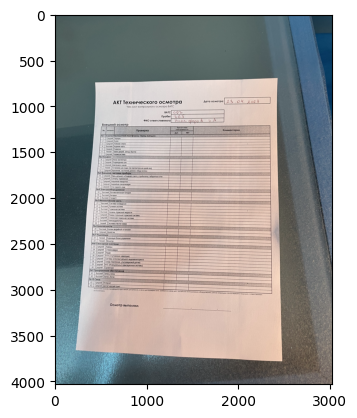

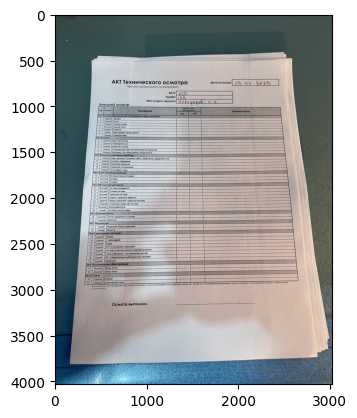

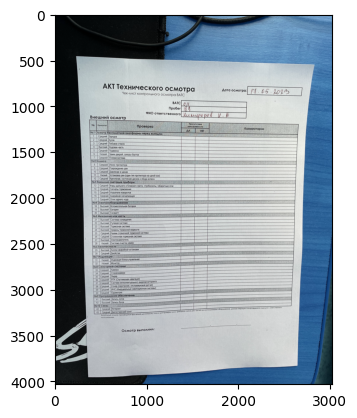

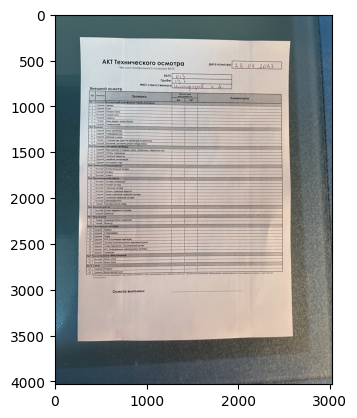

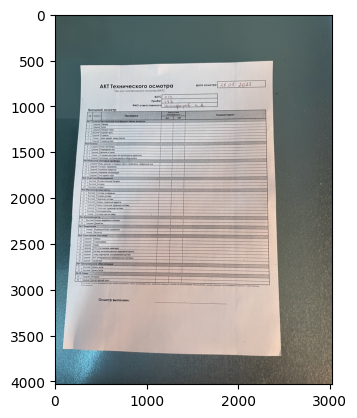

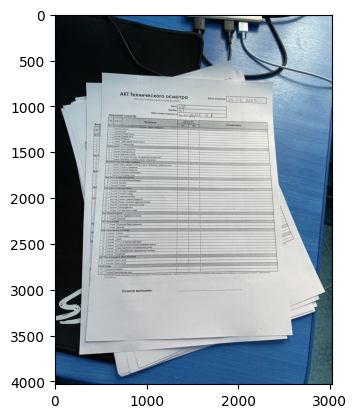

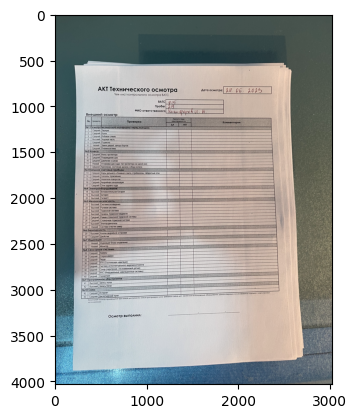

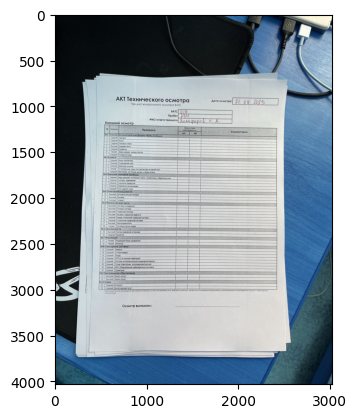

In [7]:
for ima in list_images:
    plt.imshow(ima)
    plt.show()

Порог бинаризации 

по идеи надо использовать алгоритм Оцу для оценки гистограммы 
но пока воспользуюсь подбором 


In [8]:
def get_contour(image):
    img = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    img = image[...,0]
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    ret, thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)
    
    return thresh1
    

In [9]:
test = get_contour(list_images[0])

In [10]:
test

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

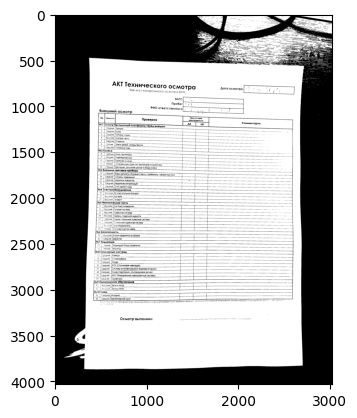

In [11]:
plt.imshow(test,cmap="gray")

теперь идея постараться оставить только беллый лист 
применю еродию с обратным дилейтом 


In [12]:
kernel_1 = np.ones((30,30), np.uint8)
kernel_2 = np.ones((20,20), np.uint8)
kernel_3 = np.ones((10,10), np.uint8)
kernel_4 = np.ones((5,5), np.uint8)
list_kernel = [kernel_1, kernel_2, kernel_3, kernel_4]

In [13]:
def clear(image, list_kernel):
    img = image.copy()
    for kernel in list_kernel:
        img = cv2.erode(img, kernel) 
    for kernel in reversed(list_kernel):
        img = cv2.dilate(img, kernel) 
    return img

In [14]:
image = clear(test, list_kernel)

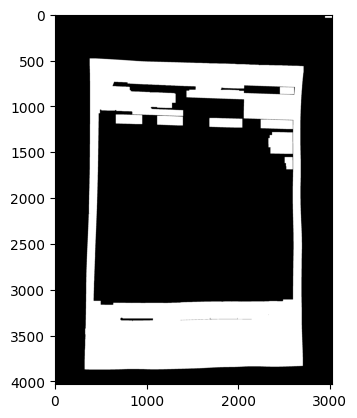

In [15]:
plt.imshow(image,cmap="gray")

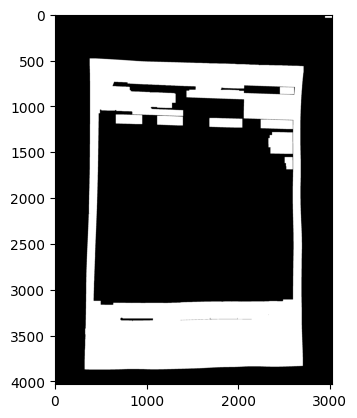

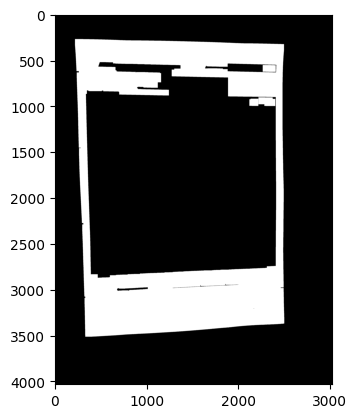

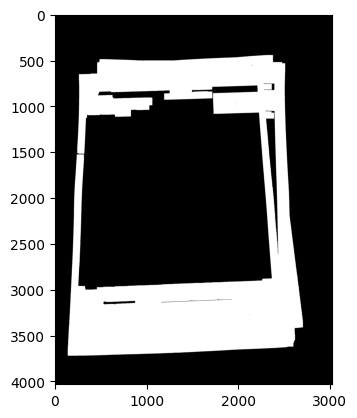

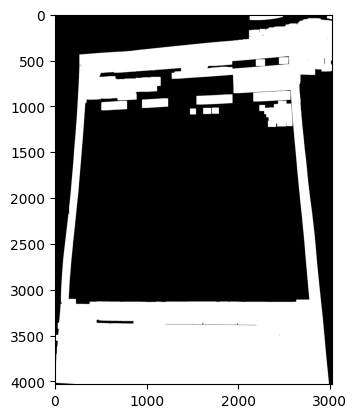

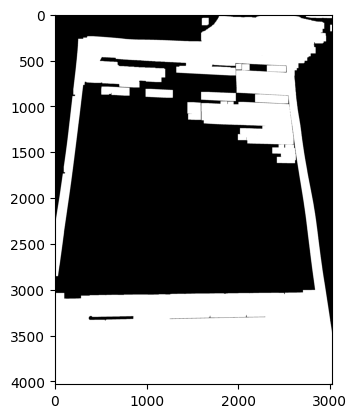

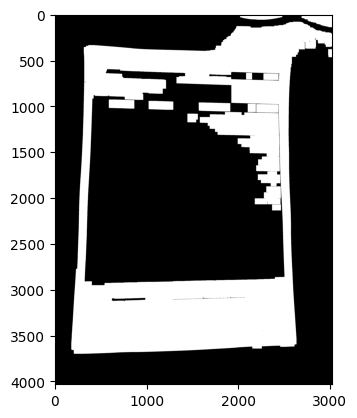

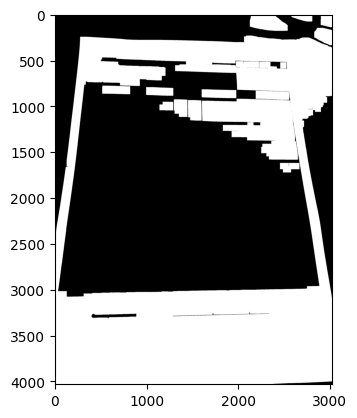

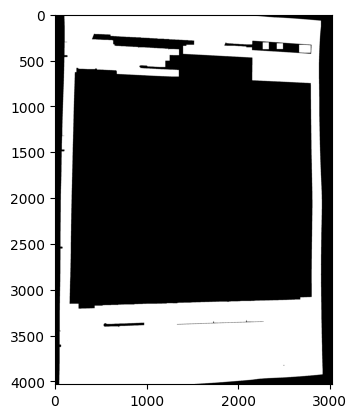

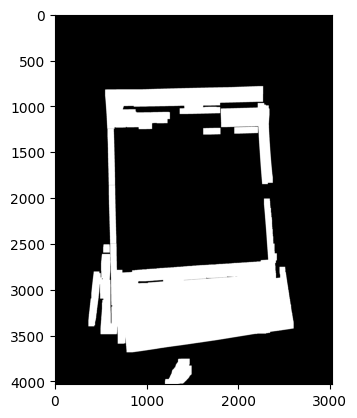

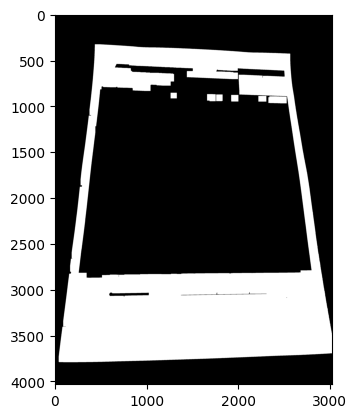

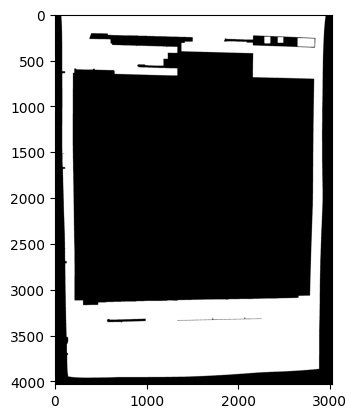

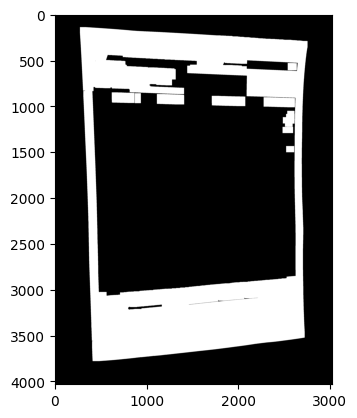

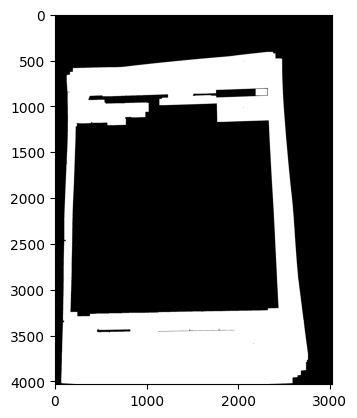

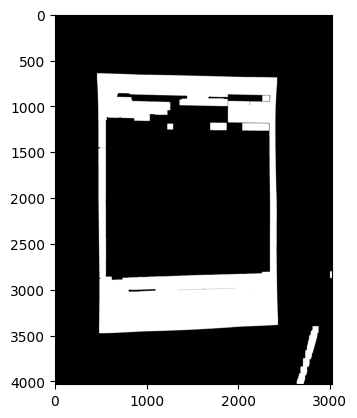

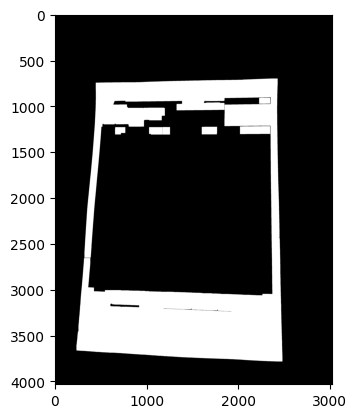

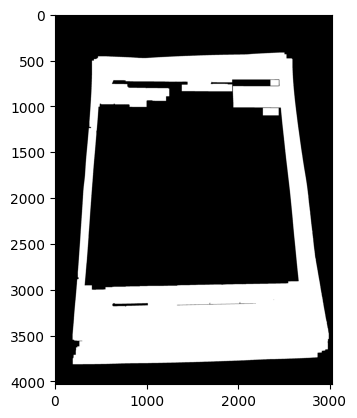

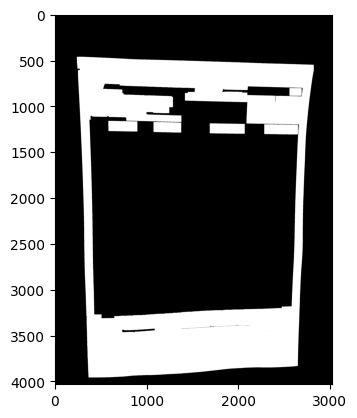

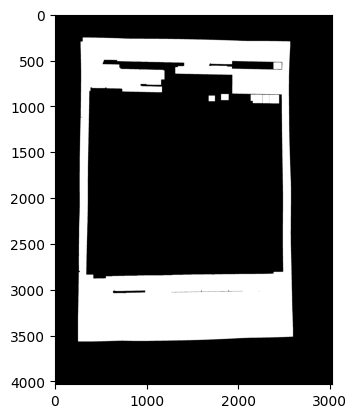

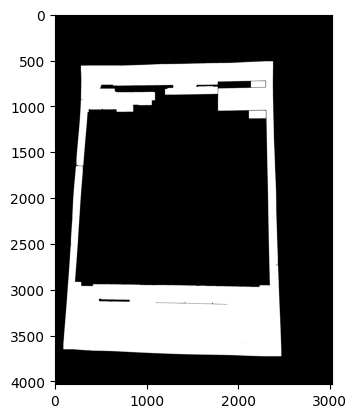

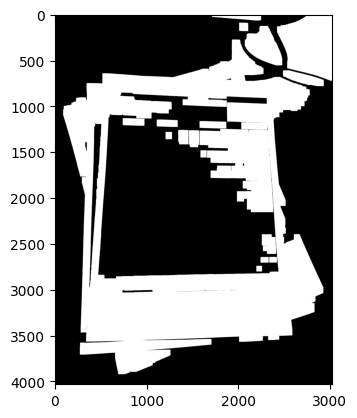

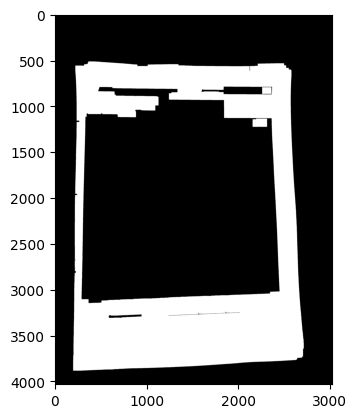

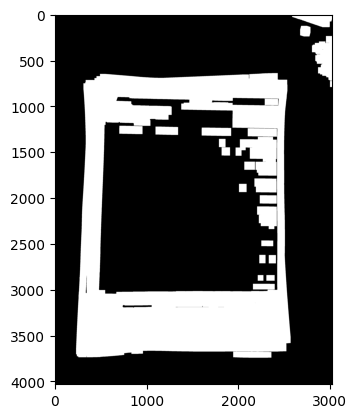

In [16]:
for ima in list_images:
    plt.imshow(clear(get_contour(ima),list_kernel), cmap="gray")
    plt.show()

In [17]:
image = cv2.dilate(image, kernel) 

NameError: name 'kernel' is not defined

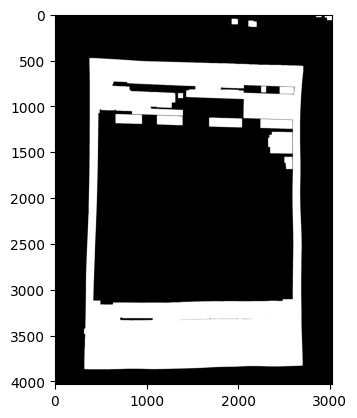

In [ ]:
plt.imshow(image,cmap="gray")

In [ ]:
test.shape

(4032, 3024)

In [ ]:
cv2.imshow('r', test)
cv2.waitKey(0)

-1

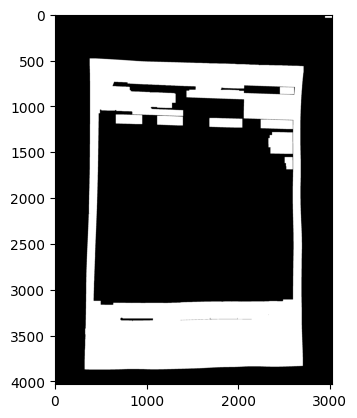

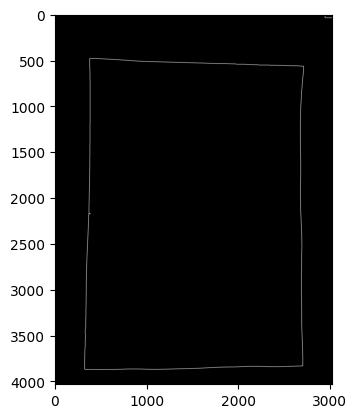

In [70]:

ima = list_images[0]
img = clear(get_contour(ima),list_kernel)
plt.imshow(img, cmap="gray")
plt.show()
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
new_image = np.zeros((img.shape[0], img.shape[1],1), dtype=np.uint8)
img_canny = cv2.Canny(img,250,255)
cv2.drawContours(new_image, contours, -1, (255), 3)
plt.imshow(new_image, cmap="gray")
plt.show()



 


In [71]:
import math

In [80]:
new_image_ = np.zeros((new_image.shape[0], new_image.shape[1],3), dtype=np.uint8)

(379, 491)


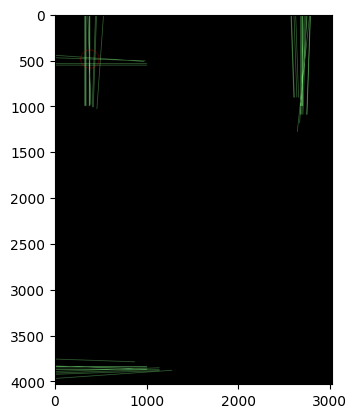

In [81]:
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.
    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [[x0, y0]]

import math
lines = cv2.HoughLines(new_image, 1, np.pi / 90, 200, 1, 0, 0)
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(new_image_, pt1, pt2, (123,234,123), 2, cv2.LINE_AA)

xy = tuple(intersection(lines[0], lines[1])[0])
print(xy)
resized = cv2.circle(new_image_, xy, 100, (255,0,0), 2)
plt.imshow(new_image_)

84


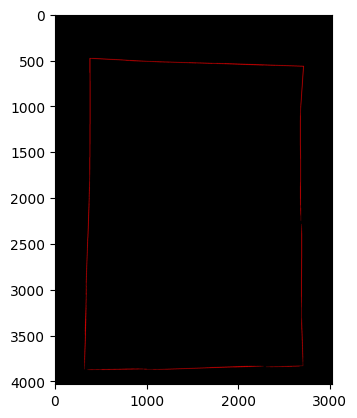

In [76]:
lines = cv2.HoughLinesP(new_image, 1, np.pi / 180, 200, 1, 0, 200)
# Draw lines on the image
new_image_ = np.zeros((new_image.shape[0], new_image.shape[1],3), dtype=np.uint8)
# lines = cv2.HoughLinesP(new_image, 1, np.pi / 180, 200, 1, 0, 200)
N = lines.shape[0]
print(len(lines))
for i in range(N):
    x1 = lines[i][0][0]
    y1 = lines[i][0][1]    
    x2 = lines[i][0][2]
    y2 = lines[i][0][3]    
    cv2.line(new_image_,(x1,y1),(x2,y2),(255,0,0),2)
plt.imshow(new_image_)

In [55]:
len(lines)

134